In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


appl_df = pd.read_csv("/mnt/c/Users/Amro/Desktop/DOI LISTS/Processing Batches - results/applications.csv")
props_df = pd.read_csv("/mnt/c/Users/Amro/Desktop/DOI LISTS/Processing Batches - results/all_properties.csv")

# matching_df = pd.read_csv("/mnt/c/Users/Amro/Desktop/DOI LISTS/Processing Batches - results/")

doi_pub_df = pd.read_csv("/mnt/c/Users/Amro/Desktop/DOI LISTS/DOI_Publisher.csv")

ws_df = pd.read_csv("/mnt/c/Users/Amro/Desktop/DOI LISTS/Processing Batches - results/water_stability.csv")

ws24_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/labels.csv")

## Examining Property Extraction

### Number of Properties per MOF before Filtering

In [50]:
props_df = props_df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis = 1).merge(doi_pub_df, how='left', right_on="DOI", left_on="Reference").drop("DOI", axis=1)

props_df.head()

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,Publisher
0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Yield,52,%,based on Cd,Cd(L2(SCN)2.Yield 52% (based on Cd).,10.1021/cg900515j,ACS
1,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Calculated for Carbon,27.28,%,Not specified,Elemental analysis calcd (%) for C10H9CdN5S4: ...,10.1021/cg900515j,ACS
2,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Found for Carbon,27.35,%,Not specified,"Found: C 27.35, H 2.19, N 15.97.",10.1021/cg900515j,ACS
3,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Calculated for Hydrogen,2.05,%,Not specified,Elemental analysis calcd (%) for C10H9CdN5S4: ...,10.1021/cg900515j,ACS
4,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Found for Hydrogen,2.19,%,Not specified,"Found: C 27.35, H 2.19, N 15.97.",10.1021/cg900515j,ACS


In [51]:
props_per_mof = props_df[["Ref Code", "Property"]].groupby("Ref Code").count()
average_PPM = props_per_mof["Property"].mean()

print(f"Average properties per CSD Entry: {average_PPM:.1f}")

Average properties per CSD Entry: 10.4


In [79]:
props_df[props_df["Property"].apply(lambda x: "absorption coefficient" in x.lower())]

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,Publisher
31,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,absorption coefficient,10.967,mm-1,Not specified,abs coeff (mm-1) 10.967,10.1021/ic0201856,ACS
51,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,absorption coefficient,5.344,mm−1,Not specified,Crystallographic Data and Refinement Parameter...,10.1021/cg901327m,ACS
102,"∞3[SmCl3(1,4-Ph(CN)2)]<|>compound 1",BOLHAM,absorption coefficient,65.3,cm−1,Not specified,"""Crystallographic Data for ∞3[LnCl3(1,4-Ph(CN)...",10.1021/ic800635u,ACS
122,"∞3[GdCl3(1,4-Ph(CN)2)]<|>compound 2",BOLHOA,absorption coefficient,73.9,cm−1,Not specified,μ/cm−1 73.9,10.1021/ic800635u,ACS
144,"∞3[TbCl3(1,4-Ph(CN)2)]<|>compound 3",BOLHEQ,absorption coefficient,78.8,cm−1,NaN,"""μ/cm−1 65.3 73.9 78.8 82.4 29.0""",10.1021/ic800635u,ACS
...,...,...,...,...,...,...,...,...,...
153790,"{[Nd2(2,6-pdc)2(H2O)8][Fe(CN)5NO]·4H2O}n<|>com...",BUWMAJ,absorption coefficient,3.533,mm−1,NaN,Absorption coefficient/mm−1 3.533,10.1016/j.molstruc.2015.11.070,Elsevier
153887,Co3(pytac)68<|>compound 1<|>structure 1,YUMFES,absorption coefficient,1.103,mm⁻¹,NaN,"""Absorption coefficient 1.103mm⁻¹""",10.1016/j.solidstatesciences.2007.10.031,Elsevier
153929,"Cd(CN)2(4,4'–bipy)0.5<|>compound 1",WOFWET,absorption coefficient,2.425,mm−1,NaN,"""μ,mm−1 2.425""",10.1016/S1463-0184(00)00026-5,Elsevier
153943,"[Cd(2,2'–bipy)(CN)2]3·H2O<|>compound 2",WOFWIX,absorption coefficient,1.698,mm−1,NaN,"Compound 1 2 Structural formula Cd(CN)2(4,4'–b...",10.1016/S1463-0184(00)00026-5,Elsevier


### Properties per MOF for Each Publisher

<Axes: xlabel='Publisher'>

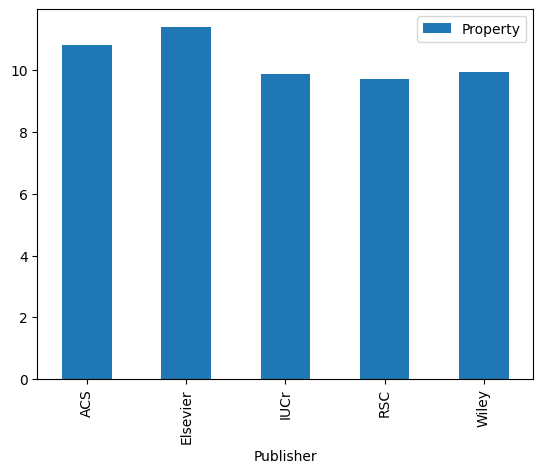

In [52]:
props_per_mof = props_df[["Ref Code", "Property", "Publisher"]].groupby(["Ref Code", "Publisher"]).count().groupby("Publisher").mean()

props_per_mof.plot(kind="bar")

### Distribution of Properties found

In [71]:
dist_props = props_df
dist_props["Property"] = dist_props["Property"].apply(lambda x: x.lower())
dist_props = props_df[["Ref Code", "Property"]].groupby("Property").count().sort_values("Ref Code", ascending=False)

dist_props.reset_index(inplace=True)

dist_props.head()

,Property,Ref Code
0,space group,10390
1,crystal system,9490
2,cell volume,5547
3,density,4869
4,thermal stability,3972


In [72]:
uptake_df = dist_props[dist_props["Property"].apply(lambda x: "uptake" in x.lower())]

In [73]:
len(dist_props)

25785

Text(0.5, 1.0, 'Distribution of extracted properties')

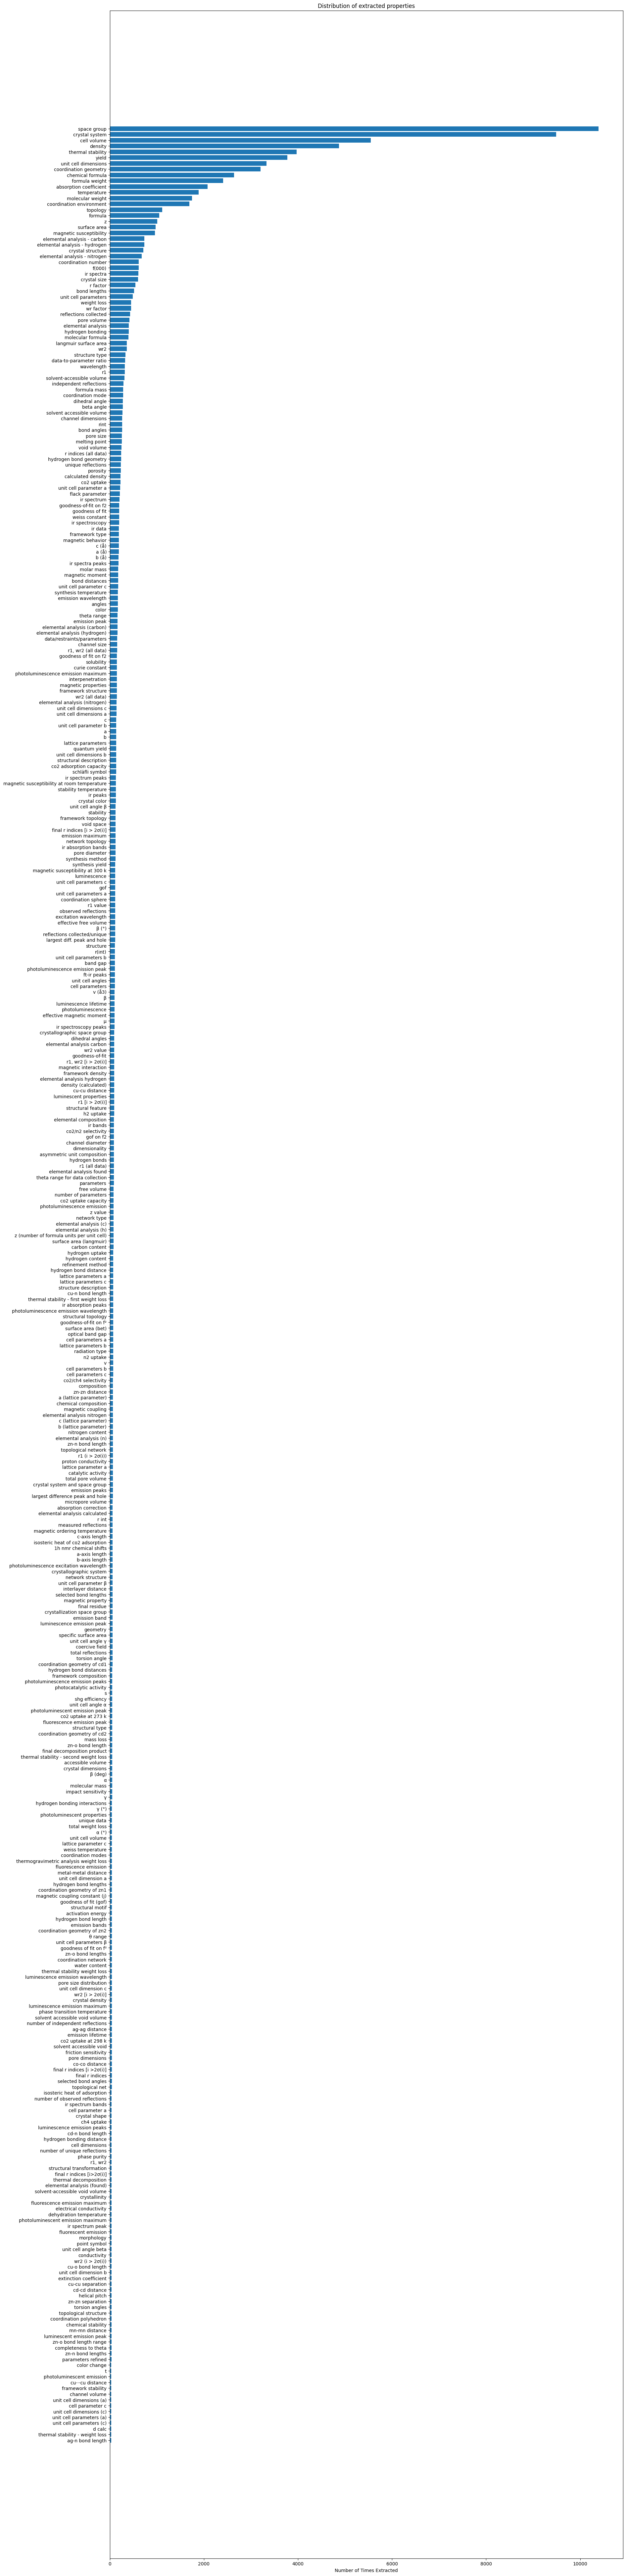

In [78]:
fig, ax = plt.subplots(figsize=(20, 100))

labels = list(dist_props["Property"].iloc[:400])
pos = np.arange(len(labels))

values = dist_props["Ref Code"].iloc[:400]

ax.barh(pos, values, align='center')
ax.set_yticks(pos, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Number of Times Extracted")
ax.set_title("Distribution of extracted properties")

### Distribution of properties found after filtering and name standardization

## Examining Application Extraction